In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset of Loan Processing Data
loands= pd.read_csv('loan_prediction.csv')
loands

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# 1st 5 rows of dataset
loands.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#last 5 rows of dataset
loands.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# total number rows and columns in the dataset
loands.shape


(614, 13)

In [6]:
loands.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
loands.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# To find if there are any null values
loands.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<font color=red> Since our target variable is 'Loan Status' will do not have any null values, we can go ahead and drop the remaining values which are not so important</font>

In [9]:
# To drop the remaining missing values
loands=loands.dropna()

In [10]:
# Let's find again if there are any null values
loands.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# For better understanding, replacing Loan Status labels from Y/N to 1 and 0 respectively
loands.replace({"Loan_Status":{'Y':1,'N':0}},inplace=True)

In [12]:
#Check Loan Status column again
loands.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [13]:
# To find the values present in Dependents Column
loands['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [14]:
# To change 3+ to 4 
loands.replace({"Dependents":{'3+':4}},inplace=True)

In [15]:
# To find the changes of values present in Dependents Column
loands['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [16]:
# For better understanding, replacing Married labels from YES/NO to 1 and 0 respectively
loands.replace({"Married":{'Yes':1,'No':0}},inplace=True)

In [17]:
# For better understanding, replacing Self Employed labels from YES/NO to 1 and 0 respectively
loands.replace({"Self_Employed":{'Yes':1,'No':0}},inplace=True)

In [18]:
# For better understanding, replacing Gender labels from Male/Female to 1 and 0 respectively
loands.replace({"Gender":{'Male':1,'Female':0}},inplace=True)

In [19]:
# For better understanding, replacing Education labels from Graduate/Not Graduate to 1 and 0 respectively
loands.replace({"Education":{'Graduate':1,'Not Graduate':0}},inplace=True)

In [20]:
# For better understanding, replacing Propery Area labels from Rural/Urban/Semi Urban to 0,1 and 2 respectively
loands.replace({"Property_Area":{'Rural':0,'Urban':1,'Semiurban':2}},inplace=True)

In [21]:
loands

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


# Exploratory Data Analysis (EDA)
# Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

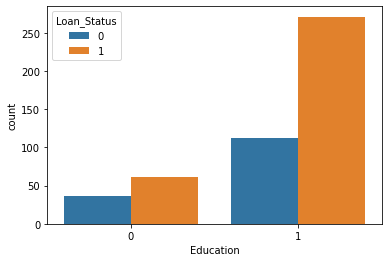

In [22]:
# Visualization between Education aand Loan Status
sns.countplot(x='Education',hue='Loan_Status',data =loands)

<font color=red> As per the observation, loan is approved for Graduates than NonGraduates</font>

<AxesSubplot:xlabel='Married', ylabel='count'>

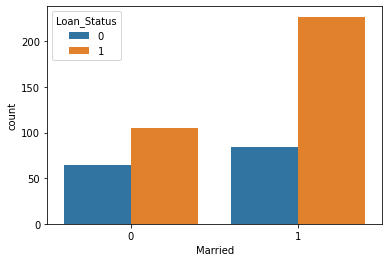

In [23]:
# Visualization between Marital Status aand Loan Status
sns.countplot(x='Married',hue='Loan_Status',data =loands)

<font color=red> As per the observation, loan is approved for Married people than Unmarried</font>

<AxesSubplot:xlabel='Gender', ylabel='count'>

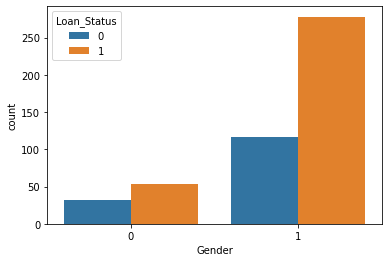

In [24]:
# Visualization between Gender aand Loan Status
sns.countplot(x='Gender',hue='Loan_Status',data =loands)

<font color=red> As per the observation, loan is approved for male than female </font>

<AxesSubplot:xlabel='Dependents', ylabel='count'>

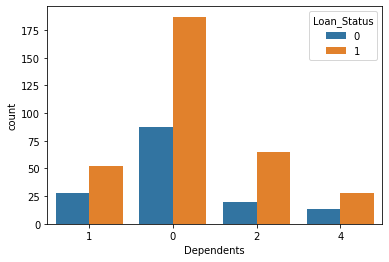

In [25]:
# Visualization between Dependents aand Loan Status
sns.countplot(x='Dependents',hue='Loan_Status',data =loands)

<font color=red> As per the observation, loan is approved for no dependents more than the dependents (1,2,4) </font>

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

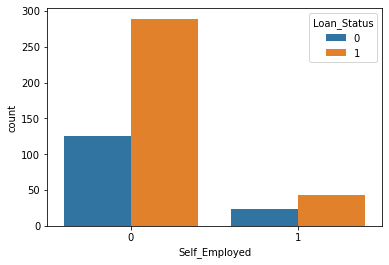

In [26]:
# Visualization between Self -Employed aand Loan Status
sns.countplot(x='Self_Employed',hue='Loan_Status',data =loands)

<font color=red> As per the observation, loan is approved for people who are not self-employed </font>

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

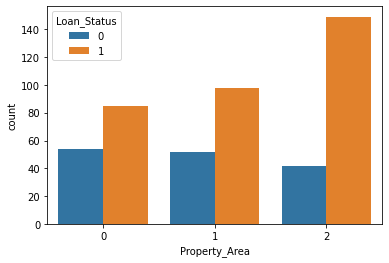

In [27]:
# Visualization between Property Area aand Loan Status
sns.countplot(x='Property_Area',hue='Loan_Status',data =loands)

<font color=red> As per the observation, loan is approved for semiurban than rural and urban </font>

In [28]:
# To drop the Loan_ID columns and seperating the target valus(Loan_Status) with other labels
X= loands.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y= loands['Loan_Status']

In [29]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [30]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


<font color=red> The total data rows were 614 but now its only 480 as we dropped the entire row which were null</font>

# Train Test Split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state =2)

In [32]:
#check the shape 
print(X.shape,X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


# CLASSIFICATION MODEL 

<font color =red>Here, we are using Support Vector Machine Model</font>

<font color =red>To find a hyperplane in an N-dimensional space that distinctly classifies the data points.</font>

In [33]:
classifier=svm.SVC(kernel="linear")

In [34]:
# Training the Model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

# Evaluate the accuracy score of Model

In [35]:
# accuracy of training data
X_train_prediction=classifier.predict(X_train)
data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [36]:
print ('Accuracy on Training Data: ' ,data_accuracy*100)

Accuracy on Training Data:  77.08333333333334


In [37]:
#Compare the Y train -original model
X_test_prediction=classifier.predict(X_test)
testdata_accuracy=accuracy_score(X_test_prediction,Y_test)

In [38]:
print ('Accuracy on Test Data: ' ,testdata_accuracy*100)

Accuracy on Test Data:  78.125


# The accuracy data for trained and test data is not overfitted. Hence this model can be used to predict loan status